In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, mean_squared_error,
    f1_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
CSV_PATH = "../data/output/clean_data.csv"

# Load data
df = pd.read_csv(CSV_PATH)

# drop non feature columns
X = df["comment_text"]   # Only keep the text column
y = df["cyberbullying"].values

# train/test split
split = int(0.8 * len(X))
X_train_text, X_test_text = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

Accuracy: 0.9518
Mean Squared Error: 0.0482
F1 Score: 0.7061


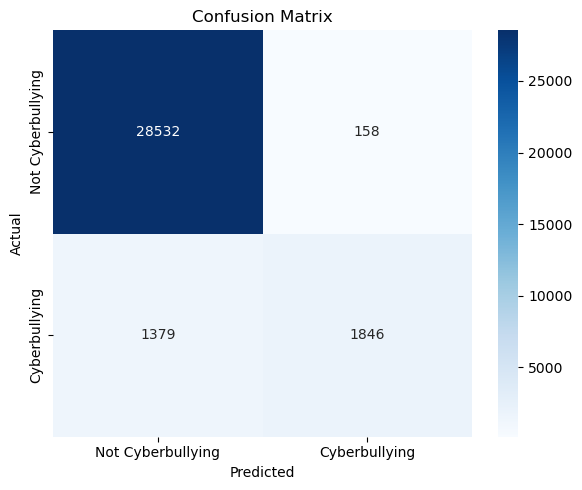


Classification Report:
                   precision    recall  f1-score   support

Not Cyberbullying       0.95      0.99      0.97     28690
    Cyberbullying       0.92      0.57      0.71      3225

         accuracy                           0.95     31915
        macro avg       0.94      0.78      0.84     31915
     weighted avg       0.95      0.95      0.95     31915



In [50]:

# Train Random Forest
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Not Cyberbullying", "Cyberbullying"],
    yticklabels=["Not Cyberbullying", "Cyberbullying"]
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Cyberbullying", "Cyberbullying"]))